# Diabetes Patients

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

C:\Users\HP\anaconda6\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**loading the dataset**

In [2]:
df= pd.read_csv("diabetes.csv")

**Exploratory Data Analysis(EDA)**

understanding dataset structure

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.shape  #total of the rows and columns

(768, 9)

In [7]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Descriptive Statistics

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Data Pre-Processing

In [10]:
#chicking missing values
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [11]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
df.duplicated().sum() #check for duplicated values

0

I noticed that there are no missing values in the dataset. However, I observed that certain features, such as Glucose, BloodPressure, and others, contain 0 values, which are not realistic. To address this issue, we replaced the 0 values with either the mean or median values of their respective columns.

In [13]:
df['Glucose'].replace(0, df['Glucose'].mean(), inplace=True)
df['BMI'].replace(0, df['BMI'].mean(), inplace=True)
df['BloodPressure'].replace(0, df['BloodPressure'].mean(), inplace=True)
df['SkinThickness'].replace(0, df['SkinThickness'].median(), inplace=True)
df['Insulin'].replace(0, df['Insulin'].median(), inplace=True)

In [14]:
#check the result
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,30.5,33.6,0.627,50,1
1,1,85.0,66.0,29,30.5,26.6,0.351,31,0
2,8,183.0,64.0,23,30.5,23.3,0.672,32,1
3,1,89.0,66.0,23,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35,168.0,43.1,2.288,33,1


Data visualisation

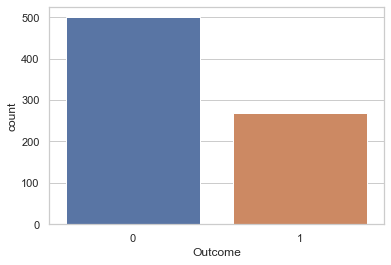

In [15]:
#distribution of outcome variable
sns.set(style="whitegrid")
sns.countplot(x="Outcome", data=df)
plt.show()

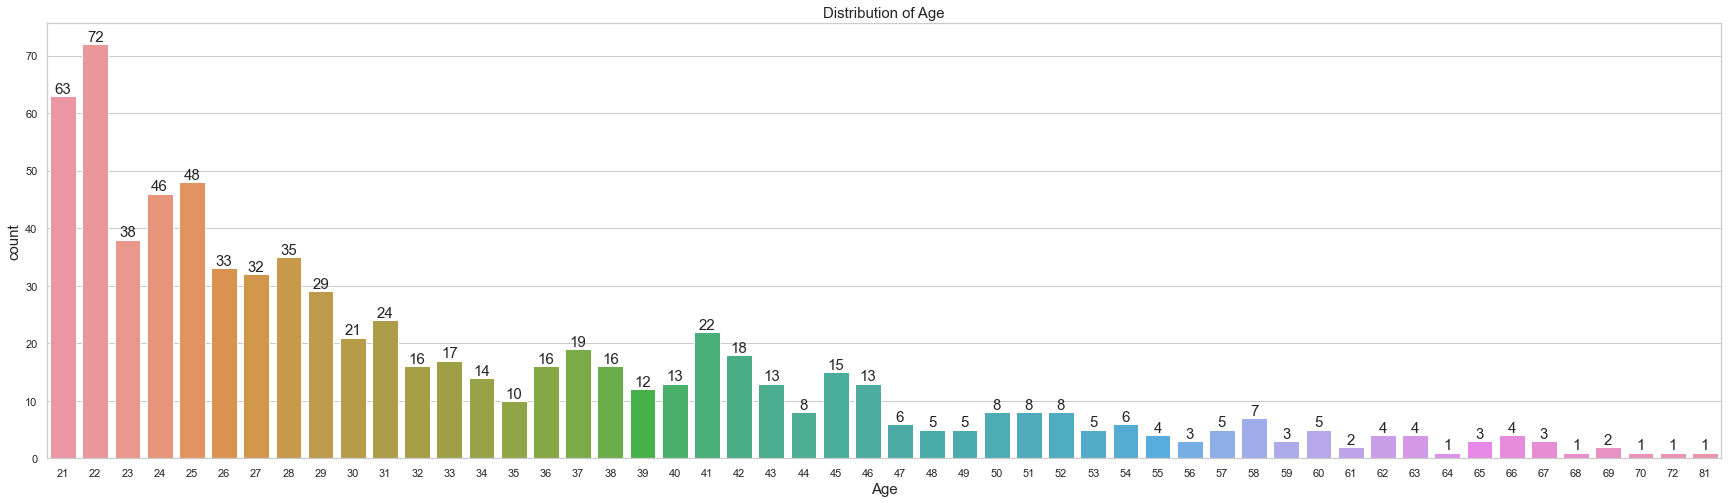

In [16]:
#distibution of Age
plt.figure(figsize=(30,8))
age= sns.barplot(x= df['Age'].value_counts().index, y=df['Age'].value_counts())
for bars in age.containers:
  age.bar_label(bars, size= 15)
plt.xlabel('Age', size=15)
plt.ylabel('count', size=15)
plt.title('Distribution of Age', size=15)
plt.show()

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

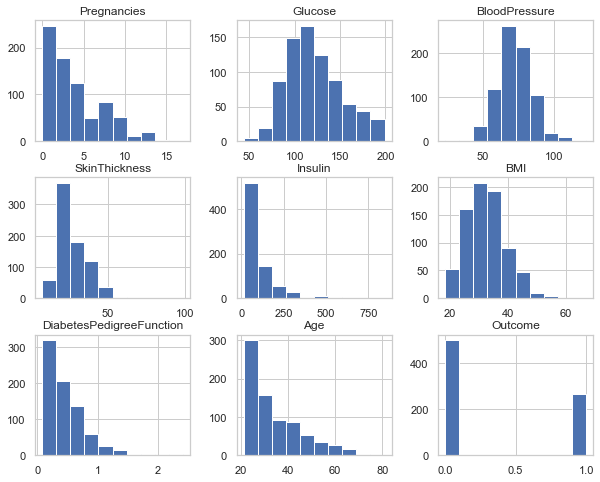

In [17]:
df.hist(figsize=(10,8)) #histogram for the entire DataFrame

Pregnancies                    AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
Outcome                        AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

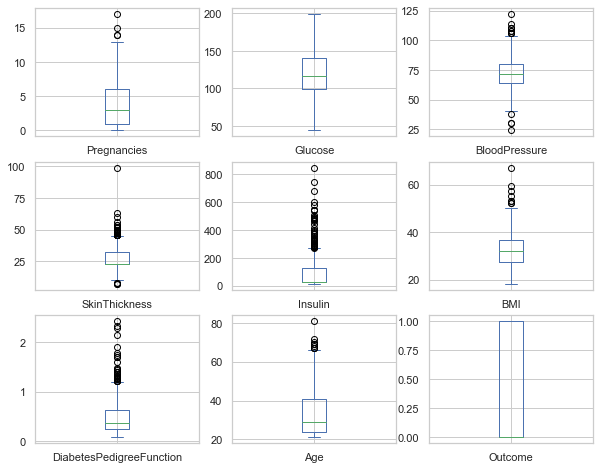

In [18]:
#plot box plots for each variable
df.plot(kind='box',subplots= True, layout= (3,3), sharex=False, sharey= False, figsize=(10,8))

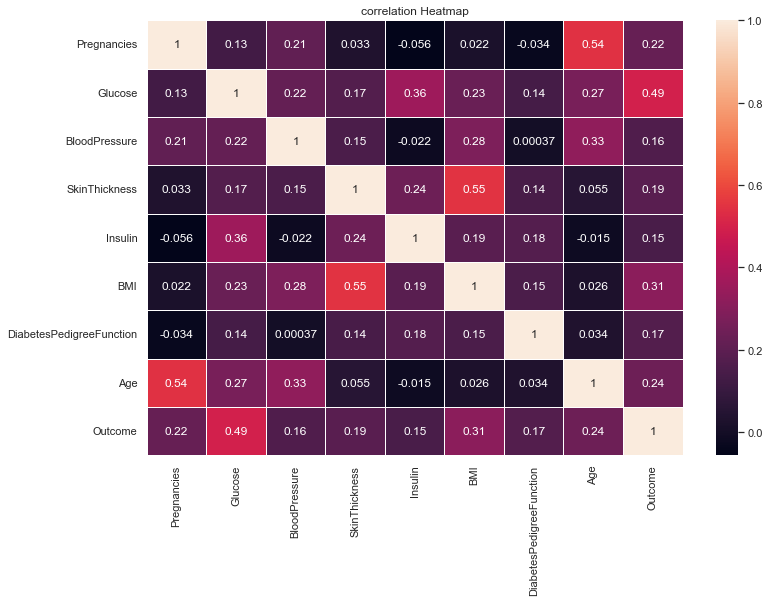

In [19]:
corr_matrix= df.corr()
#plot the correlationc heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, linewidths=0.5)
plt.title("correlation Heatmap")
plt.show()

Model Developement

In [20]:
data= ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
x= df[data]

In [21]:
y= df.Outcome
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [22]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35,30.5,33.6,0.627,50
1,1,85.0,66.0,29,30.5,26.6,0.351,31
2,8,183.0,64.0,23,30.5,23.3,0.672,32
3,1,89.0,66.0,23,94.0,28.1,0.167,21
4,0,137.0,40.0,35,168.0,43.1,2.288,33


In [23]:
#standardize the features
scaler= StandardScaler()
scaler.fit(x)
standar_df= scaler.transform(x)
print(standar_df)

[[ 0.63994726  0.86527574 -0.0210444  ...  0.16725546  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20598931 -0.51658286 ... -0.85153454 -0.36506078
  -0.19067191]
 [ 1.23388019  2.01597855 -0.68176235 ... -1.33182125  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.02240928 -0.0210444  ... -0.90975111 -0.68519336
  -0.27575966]
 [-0.84488505  0.14197684 -1.01212132 ... -0.34213954 -0.37110101
   1.17073215]
 [-0.84488505 -0.94297153 -0.18622389 ... -0.29847711 -0.47378505
  -0.87137393]]


In [24]:
x= standar_df

In [25]:
#Split the dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [26]:
x_train

array([[-0.54791859, -1.23886654, -0.260103  , ..., -0.06669102,
        -0.50700636, -1.04154944],
       [ 1.53084665, -0.31830429,  0.80485303, ..., -0.61866825,
         2.44666971,  1.4259954 ],
       [-0.84488505,  0.56938074, -2.16837773, ..., -0.54589754,
         0.55003518, -0.95646168],
       ...,
       [ 1.82781311, -0.67995374,  1.135212  , ...,  1.91375259,
         2.00573238,  0.40494237],
       [-1.14185152,  0.63513518, -0.260103  , ...,  1.44802002,
        -0.8059981 , -0.36084741],
       [-1.14185152,  0.10909961,  1.96110943, ..., -1.44825439,
        -0.63385134, -1.04154944]])

In [27]:
x_test

array([[ 0.63994726, -0.77858541, -1.17730081, ...,  0.22547203,
        -0.1264714 ,  0.83038113],
       [-0.54791859, -0.31830429,  0.22672482, ...,  0.47289246,
        -0.97814487, -1.04154944],
       [-0.54791859, -0.44981318, -0.68176235, ..., -0.24026054,
        -0.94794368, -1.04154944],
       ...,
       [ 1.23388019, -0.87721708, -0.0210444 , ...,  0.63298803,
         0.03963513,  2.02160968],
       [-0.54791859,  0.7995213 , -0.18622389, ..., -0.64777654,
        -0.40734244, -0.36084741],
       [ 1.23388019, -1.56763877, -0.18622389, ...,  0.41467589,
         0.70406123,  0.49003012]])

In [28]:
model = LogisticRegression(C=0.1, penalty='l1', solver='liblinear',max_iter=1000)
#train the model on training model
model.fit(x_train, y_train)
# Use the trained model to make predictions on the test data
y_pred = model.predict(x_test)

In [29]:
#compute the accuracy
accuracy = accuracy_score(y_test, y_pred)
#show the accuracy 
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 77.27%


In [30]:
# Generate a classification report to evaluate the model's performance
classification_report= classification_report(y_test, y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        99
           1       0.70      0.64      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.75       154
weighted avg       0.77      0.77      0.77       154



In [31]:
#predictions on the test data
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)